
## How does a merger between airlines affect prices?
### Analysis

 - using the airline-tickets-usa dataset
 


In [2]:
#!pip install plotnine

In [1]:
import os
import sys
import warnings
from datetime import datetime as dt

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from mizani.formatters import percent_format
from mizani.formatters import date_format
from plotnine import *
from stargazer.stargazer import Stargazer

warnings.filterwarnings("ignore")


# I.  Examining pre-treatment trends in avg ln price

workfile to identify treated and untreated markets

In [2]:
data_work = pd.read_pickle("airline-workfile.pkl").loc[
    lambda x: (x["balanced"] == 1) & (x["year"] == 2011)
][["origin", "finaldest", "return", "treated", "smallmkt"]]


use year-quarter panel data and merge to it treated-untreated 

(keep matched ones; no unmatched from "using")

In [3]:
#data = pd.read_stata(data_in + "originfinal-panel.dta")
data = pd.read_stata("https://osf.io/zw2h9/download")

data = pd.merge(data, data_work, on=["origin", "finaldest", "return"])


aggreagete data to create average price by treated-untreated and year-quarter and draw time series graphs of log avg price all markets

In [4]:
weighted_avg = lambda x: np.average(x, weights=data.loc[x.index, "passengers"])


In [5]:
data['quarter']

0          2
1          3
2          4
3          1
4          3
          ..
2345074    3
2345075    2
2345076    3
2345077    2
2345078    4
Name: quarter, Length: 2345079, dtype: int8

In [6]:
data_agg = (
    data.groupby(["treated", "year", "quarter"])
    .agg(avgprice=("avgprice", weighted_avg))
    .reset_index()
)




In [7]:
data_agg["lnavgprice"] = np.log(data_agg["avgprice"])
data_agg["quarters"] = (
    data_agg["year"].astype(str) + " Q" + data_agg["quarter"].astype(str)
)


In [8]:
data_agg

,treated,year,quarter,avgprice,lnavgprice,quarters
0,False,2010,2,195.457794,5.275344,2010 Q2
1,False,2010,3,190.954483,5.252035,2010 Q3
2,False,2010,4,192.923080,5.262291,2010 Q4
3,False,2011,1,214.151733,5.366685,2011 Q1
4,False,2011,2,212.308273,5.358039,2011 Q2
5,False,2011,3,211.188614,5.352752,2011 Q3
6,False,2011,4,211.747299,5.355393,2011 Q4
7,False,2012,1,215.295456,5.372011,2012 Q1
8,False,2012,2,219.829117,5.392850,2012 Q2
9,False,2012,3,213.425339,5.363287,2012 Q3


In [9]:
#data_agg["date"] = pd.to_datetime(
#    data_agg["quarters"].str.replace("\s+", "")
#).dt.to_period("Q")
data_agg["date"] = pd.to_datetime(
    data_agg["quarters"].str.replace(" Q", "-").str.strip() + "-01"
).dt.to_period("Q")


In [10]:
color = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Replace with desired colors

p= (
    ggplot(data_agg, aes(x="date", y="lnavgprice", color="treated", group="treated"))
    + geom_line(size=1.3)
    + scale_color_manual(values=(color[0], color[1]), guide=False)
    + scale_x_datetime(
        limits=(
            dt.strptime("2010-01-01", "%Y-%m-%d"),
            dt.strptime("2017-01-01", "%Y-%m-%d"),
        ),
        breaks=["2010-01-01", "2012-01-01", "2014-01-01", "2016-01-01"],
        labels=date_format("%Y%Q"),
    )
    + scale_y_continuous(expand=(0.01, 0.01), limits=(5, 5.6), breaks=np.arange(5, 5.7, 0.1))
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
        y=5.14,
        label="Treated markets",
        size=10,
        color=color[1],
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
        y=5.46,
        label="Unreated markets",
        size=10,
        color=color[0],
    )
    + geom_vline(
        xintercept=data_agg.loc[data_agg["quarters"] == "2012 Q1", "date"].values[0],
        color=color[2],
        size=0.9,
        linetype="dashed",
    )
    + geom_vline(
        xintercept=data_agg.loc[data_agg["quarters"] == "2015 Q3", "date"].values[0],
        color=color[2],
        size=0.9,
        linetype="dashed",
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2011 Q1", "date"].values[0],
        y=5.57,
        label="Announcement",
        size=7,
        color=color[2],
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2014 Q2", "date"].values[0],
        y=5.57,
        label="Merger happens",
        size=7,
        color=color[2],
    )
    + labs(y="ln(average price)", x="")
    + theme_bw()
    + theme(
        axis_text_x=element_text(size=9),
        axis_text_y=element_text(size=9),
        axis_title_x=element_text(size=9),
        axis_title_y=element_text(size=9),
    )
)
p.save("parallel_trends_plot.png", width=10, height=6, dpi=300)

**Small markets**

In [11]:
data_agg = (
    data.query("smallmkt == 1")
    .groupby(["treated", "year", "quarter"])
    .agg(avgprice=("avgprice", weighted_avg))
    .reset_index()
)

In [12]:
data_agg["lnavgprice"] = np.log(data_agg["avgprice"])
data_agg["quarters"] = (
    data_agg["year"].astype(str) + " Q" + data_agg["quarter"].astype(str)
)


In [13]:
data_agg["date"] = pd.to_datetime(
    data_agg["quarters"].str.replace(" Q", "-")
).dt.to_period("Q")



In [14]:
p_small=(
    ggplot(data_agg, aes(x="date", y="lnavgprice", color="treated", group="treated"))
    + geom_line(size=1.3)
    + scale_color_manual(values=(color[0], color[1]), guide=False)
    + scale_x_datetime(
        limits=(
            dt.strptime("2010-01-01", "%Y-%m-%d"),
            dt.strptime("2017-01-01", "%Y-%m-%d"),
        ),
        breaks=["2010-01-01", "2012-01-01", "2014-01-01", "2016-01-01"],
        labels=date_format("%Y%Q"),
    )
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(5.2, 5.7), breaks=np.arange(5.3, 5.6, 0.1)
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
        y=5.4,
        label="Treated markets",
        size=9,
        color=color[1],
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
        y=5.6,
        label="Unreated markets",
        size=9,
        color=color[0],
    )
    + geom_vline(
        xintercept=data_agg.loc[data_agg["quarters"] == "2012 Q1", "date"].values[0],
        color=color[2],
        size=0.9,
        linetype="dashed",
    )
    + geom_vline(
        xintercept=data_agg.loc[data_agg["quarters"] == "2015 Q3", "date"].values[0],
        color=color[2],
        size=0.9,
        linetype="dashed",
    )
    + labs(y="ln(average price)", x="")
    + theme_bw()
    + theme(
        axis_text_x=element_text(size=9),
        axis_text_y=element_text(size=9),
        axis_title_x=element_text(size=9),
        axis_title_y=element_text(size=9),
    )
)

p_small.save("parallel_trends_plot_small.png", width=10, height=6, dpi=300)

**Large markets**

In [15]:
data_agg = (
    data.query("smallmkt == 0")
    .groupby(["treated", "year", "quarter"])
    .agg(avgprice=("avgprice", weighted_avg))
    .reset_index()
)

data_agg["lnavgprice"] = np.log(data_agg["avgprice"])
data_agg["quarters"] = (
    data_agg["year"].astype(str) + " Q" + data_agg["quarter"].astype(str)
)
data_agg["date"] = pd.to_datetime(
    data_agg["quarters"].str.replace(" Q", "-")
).dt.to_period("Q")


In [16]:
p_large=(
    ggplot(data_agg, aes(x="date", y="lnavgprice", color="treated", group="treated"))
    + geom_line(size=1.3)
    + scale_color_manual(values=(color[0], color[1]), guide=False)
    + scale_x_datetime(
        limits=(
            dt.strptime("2010-01-01", "%Y-%m-%d"),
            dt.strptime("2017-01-01", "%Y-%m-%d"),
        ),
        breaks=["2010-01-01", "2012-01-01", "2014-01-01", "2016-01-01"],
        labels=date_format("%Y%Q"),
    )
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(3.75, 5), breaks=np.arange(3.75, 5, 0.25)
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
        y=4.7,
        label="Treated markets",
        size=9,
        color=color[1],
    )
    + annotate(
        "text",
        x=data_agg.loc[data_agg["quarters"] == "2013 Q1", "date"].values[0],
        y=4.3,
        label="Unreated markets",
        size=9,
        color=color[0],
    )
    + geom_vline(
        xintercept=data_agg.loc[data_agg["quarters"] == "2012 Q1", "date"].values[0],
        color=color[2],
        size=0.9,
        linetype="dashed",
    )
    + geom_vline(
        xintercept=data_agg.loc[data_agg["quarters"] == "2015 Q3", "date"].values[0],
        color=color[2],
        size=0.9,
        linetype="dashed",
    )
    + labs(y="ln(average price)", x="")
    + theme_bw()
    + theme(
        axis_text_x=element_text(size=9),
        axis_text_y=element_text(size=9),
        axis_title_x=element_text(size=9),
        axis_title_y=element_text(size=9),
    )
)
p_large.save("parallel_trends_plot_large.png", width=10, height=6, dpi=300)

# II. ANALYSIS
**Basic diff-in-diffs regression, weighted by # passengers on market, in before period**

In [17]:
# reload main file
data_agg = pd.read_pickle("airline-workfile.pkl")
# keep balanced
data_balanced = data_agg.query("balanced == 1")


In [18]:
fd = smf.wls(
    "d_lnavgp ~ treated", data_balanced, weights=data_balanced["pass_bef"]
).fit(cov_type="HC0")
fd_small = smf.wls(
    "d_lnavgp ~ treated",
    data_balanced.query("smallmkt == 1"),
    weights=data_balanced.query("smallmkt == 1")["pass_bef"],
).fit(cov_type="HC0")
fd_large = smf.wls(
    "d_lnavgp ~ treated",
    data_balanced.query("smallmkt == 0"),
    weights=data_balanced.query("smallmkt == 0")["pass_bef"],
).fit(cov_type="HC0")


In [19]:
stargazer = Stargazer([fd, fd_small, fd_large])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["All markest", "Small markets", "Large markets"], [1, 1, 1])
HTML(stargazer.render_html())


In [20]:
# Corresponding diff-in-diffs table
weighted_avg = lambda x: np.average(
    x,
    weights=data_balanced.loc[data_balanced["lnavgp"].notnull()].loc[
        x.index, "pass_bef"
    ],
)
data_balanced.loc[data_balanced["lnavgp"].notnull()].groupby(["after", "treated"]).agg(
    avgprice=("lnavgp", weighted_avg), n=("lnavgp", "count")
)


avgprice       n
after treated                  
0     False    4.926512  101275
      True     4.962715   11629
1     False    5.082928  101144
      True     4.939714   11628

**Diff-in-diffs regression with confounder variables weighted by # passengers on market, in before period**

In [21]:
data_balanced = data_balanced.merge(
    data_balanced.loc[lambda x: x["before"] == 1]
    .assign(
        lnpass=lambda x: np.log(x["passengers"]),
        sum_shares_bef=lambda x: x["shareAA"] + x["shareUS"],
    )
    .groupby("market")
    .agg(
        lnpass_bef=("lnpass", np.nanmean),
        share_bef=("sum_shares_bef", np.nanmean),
        sharelarge_bef=("sharelargest", np.nanmean),
    )
    .reset_index(),
    on="market",
)


In [22]:
data_balanced = data_balanced.rename(columns={"return": "return_"})


In [23]:
formula2 = "d_lnavgp ~ treated + lnpass_bef + return_ + stops + sharelarge_bef"

fd2 = smf.wls(formula2, data_balanced, weights=data_balanced["pass_bef"]).fit(
    cov_type="HC1"
)
fd2_small = smf.wls(
    formula2,
    data_balanced.query("smallmkt == 1"),
    weights=data_balanced.query("smallmkt == 1")["pass_bef"],
).fit(cov_type="HC0")
fd2_large = smf.wls(
    formula2,
    data_balanced.query("smallmkt == 0"),
    weights=data_balanced.query("smallmkt == 0")["pass_bef"],
).fit(cov_type="HC0")


In [24]:
stargazer = Stargazer([fd2, fd2_small, fd2_large])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["All markest", "Small markets", "Large markets"], [1, 1, 1])
HTML(stargazer.render_html())


**Diff-in-diffs regerssion with quantitative treatment weighted by # passengers on market, in before period**

In [25]:
share_bef_1 = np.where(data_balanced.query("before == 1")["share_bef"] == 1, 1, 0)
share_bef_0 = np.where(data_balanced.query("before == 1")["share_bef"] == 0, 1, 0)


In [26]:
data_balanced.query("before == 1").groupby([share_bef_0, share_bef_1]).agg(
    sum=("passengers", sum), mean=("passengers", "mean"), n=("passengers", "count")
)  # bit different from R


sum        mean      n
0 0  20169344  542.376207  37187
  1     34139    9.041049   3776
1 0   3746736   51.977360  72084

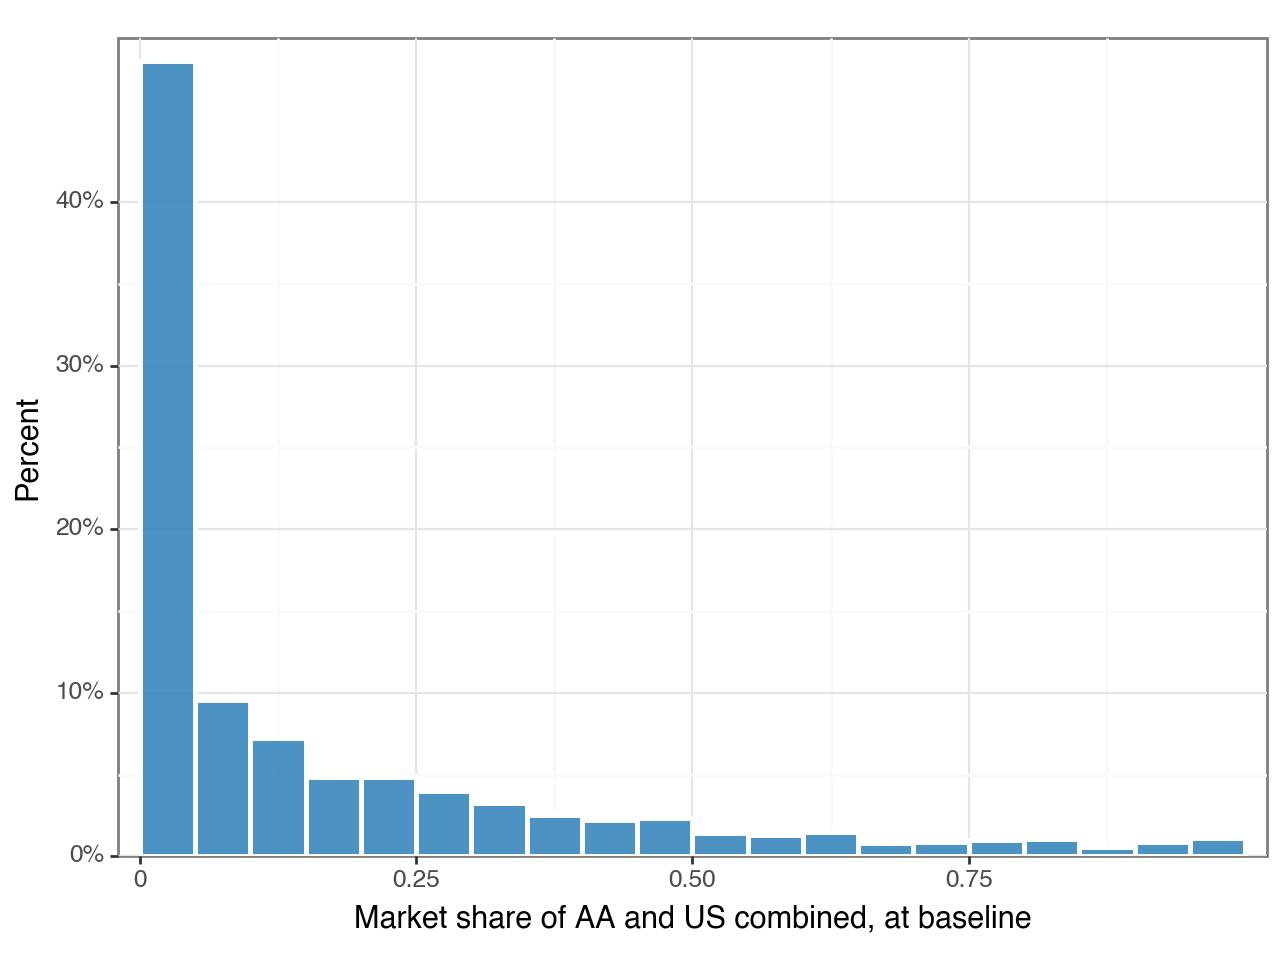

<Figure Size: (640 x 480)>

In [27]:
(
    ggplot(
        data_balanced, aes(x="share_bef", y="stat(width*density)", weight="pass_bef")
    )
    + geom_histogram(
        binwidth=0.05,
        boundary=0,
        fill=color[0],
        alpha=0.8,
        colour="white",
        size=1,
        show_legend=False,
    )
    + labs(x="Market share of AA and US combined, at baseline", y="Percent")
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 1), breaks=np.arange(0, 1, 0.25)
    )
    + scale_y_continuous(
        expand=(0.0, 0.0),
        limits=(0, 0.5),
        breaks=np.arange(0, 0.5, 0.1),
        labels=percent_format(),
    )
    + theme_bw()
)


In [28]:
formula3 = "d_lnavgp ~ share_bef + lnpass_bef + return_ + stops + sharelarge_bef"
fd3 = smf.wls(formula3, data_balanced, weights=data_balanced["pass_bef"]).fit(
    cov_type="HC0"
)
fd3_small = smf.wls(
    formula3,
    data_balanced.query("smallmkt == 1"),
    weights=data_balanced.query("smallmkt == 1")["pass_bef"],
).fit(cov_type="HC0")
fd3_large = smf.wls(
    formula3,
    data_balanced.query("smallmkt == 0"),
    weights=data_balanced.query("smallmkt == 0")["pass_bef"],
).fit(cov_type="HC0")


In [29]:
stargazer = Stargazer([fd3, fd3_small, fd3_large])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["All markest", "Small markets", "Large markets"], [1, 1, 1])
HTML(stargazer.render_html())


**Diff-in-diffs on pooled cross-sections regeression**
* use entire unbalanced panel
* errr... after only is dropped here see later
* weighted by # passengers on market, in before period

In [30]:
data_agg = data_agg.merge(
    data_agg.loc[lambda x: x["before"] == 1]
    .assign(lnpass_bef=lambda x: np.log(x["passengers"]))
    .groupby("market")
    .agg(
        lnpass_bef=("lnpass_bef", np.nanmean),
        sharelarge_bef=("sharelargest", np.nanmean),
    )
    .reset_index(),
    on="market",
    how="left",
)


In [31]:
data_agg.groupby(["balanced", "before"]).agg({"passengers": ["sum", "count"]})


passengers        
                       sum   count
balanced before                   
False    0          457978   22851
         1          103082   28665
True     0        30186202  113047
         1        23950219  113047

In [32]:
# treatment group defined if observed before only or both before and after


In [33]:
data_agg = data_agg.merge(
    data_agg.loc[lambda x: x["before"] == 1]
    .groupby("market")
    .agg(treatment=("AA_and_US", np.nanmean))
    .reset_index(),
    on="market",
)


In [34]:
data_agg["treatment_isna"] = data_agg["treatment"].isna()
data_agg.groupby(["treatment_isna", "balanced"]).agg({"passengers": ["sum", "count"]})


passengers        
                               sum   count
treatment_isna balanced                   
False          False        103082   28665
               True       54136421  226094

In [35]:
data_agg = data_agg.rename(columns={"return": "return_"})


In [36]:
# conditioning on observed confounders
formula4 = "lnavgp ~ (treatment + lnpass_bef + return_ + stops + sharelarge_bef)*after"

fd4 = smf.wls(formula4, data_agg, weights=data_agg["pass_bef"]).fit(cov_type="HC0")
fd4_small = smf.wls(
    formula4,
    data_agg.query("smallmkt == 1"),
    weights=data_agg.query("smallmkt == 1")["pass_bef"],
).fit(cov_type="HC0")
fd4_large = smf.wls(
    formula4,
    data_agg.query("smallmkt == 0"),
    weights=data_agg.query("smallmkt == 0")["pass_bef"],
).fit(cov_type="HC0")


In [37]:
stargazer = Stargazer([fd4, fd4_small, fd4_large])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["All markest", "Small markets", "Large markets"], [1, 1, 1])
HTML(stargazer.render_html())


In [38]:
data_balanced

,origin,finaldest,return_,year,airports,return_sym,stops,ptotalAA,ptotalUS,ptotallargest,...,pass_aft,balanced,treated,untreated,smallmkt,lnavgp,d_lnavgp,lnpass_bef,share_bef,sharelarge_bef
0,ABE,ABI,1,2011,7,1.0,2,0.0,0.0,2.0,...,5.0,True,False,True,True,6.604621,NaN,0.693147,0.000000,1.000000
1,ABE,ABI,1,2016,7,1.0,2,3.0,0.0,4.0,...,5.0,True,False,True,True,6.604215,-0.000406,0.693147,0.000000,1.000000
2,ABE,ABQ,0,2011,3,NaN,1,0.0,0.0,13.0,...,11.0,True,False,True,True,5.818663,NaN,3.135494,0.000000,0.565217
3,ABE,ABQ,0,2016,4,NaN,2,1.0,0.0,5.0,...,11.0,True,False,True,True,6.006129,0.187466,3.135494,0.000000,0.565217
4,ABE,ABQ,1,2011,5,0.0,1,0.0,1.0,38.0,...,33.0,True,False,True,True,6.038091,NaN,4.330733,0.013158,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226089,YUM,XNA,1,2016,7,1.0,2,0.0,0.0,5.0,...,5.0,True,False,True,True,6.451102,0.523110,1.609438,0.000000,1.000000
226090,YUM,YKM,0,2011,4,NaN,2,0.0,0.0,2.0,...,2.0,True,False,True,True,5.547129,NaN,0.693147,0.000000,1.000000
226091,YUM,YKM,0,2016,4,NaN,2,0.0,0.0,2.0,...,2.0,True,False,True,True,5.339939,-0.207190,0.693147,0.000000,1.000000
226092,YUM,YKM,1,2011,7,1.0,2,0.0,0.0,2.0,...,2.0,True,False,True,True,6.271933,NaN,0.693147,0.000000,1.000000


In [39]:
import matplotlib.pyplot as plt


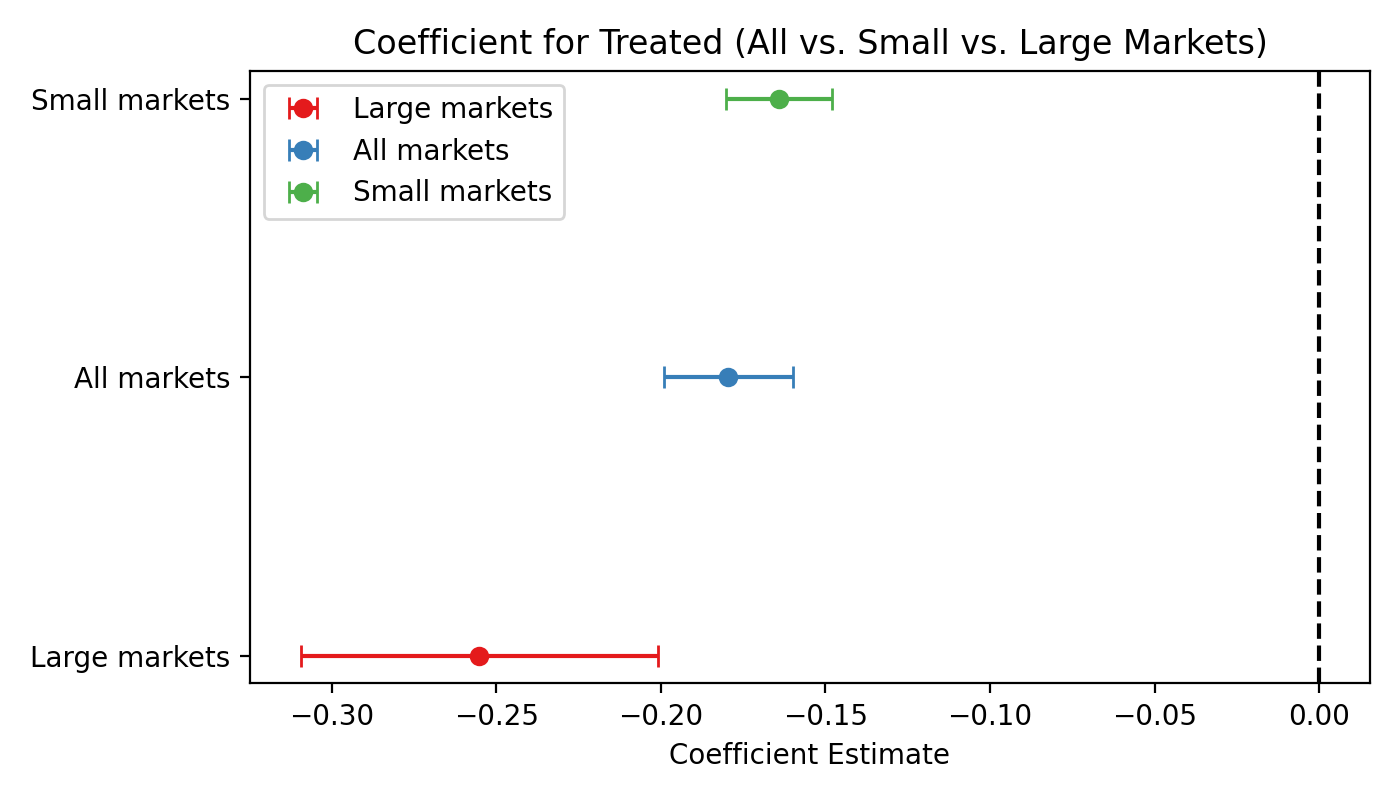

In [48]:
single_coef_comparison_plot(
    results_dict=results_dict, 
    var="treated[T.True]",           # or "AAUS_before", depending on your model
    title="Coefficient for Treated (All vs. Small vs. Large Markets)"
)


In [53]:
print("fd4 params:", fd.params.index)
print("fd4_small params:", fd_small.params.index)
print("fd4_large params:", fd_large.params.index)


fd4 params: Index(['Intercept', 'treated[T.True]'], dtype='object')
fd4_small params: Index(['Intercept', 'treated[T.True]'], dtype='object')
fd4_large params: Index(['Intercept', 'treated[T.True]'], dtype='object')


In [49]:
results_dict2 = {
    "All markets": fd2,
    "Small markets": fd_small,
    "Large markets": fd_large
}

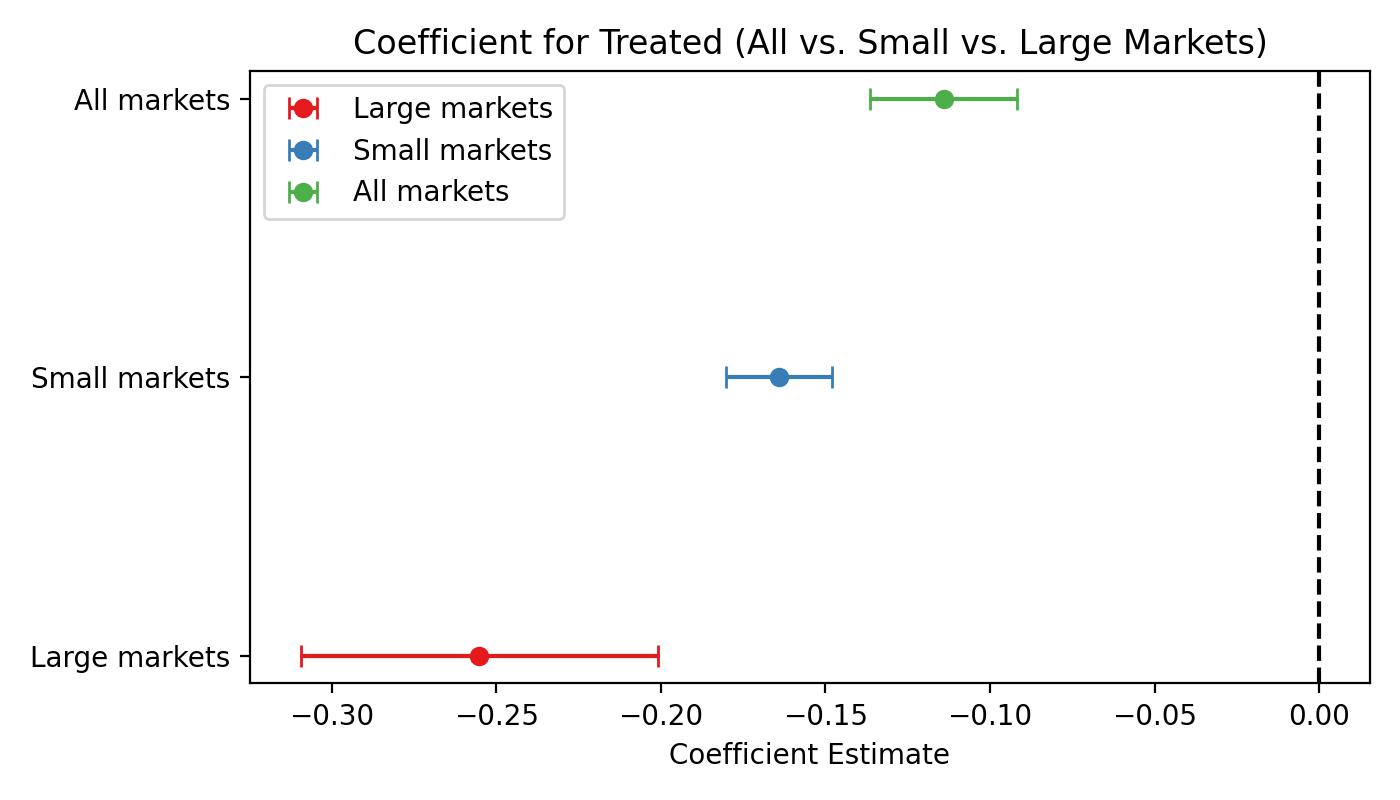

In [50]:
single_coef_comparison_plot(
    results_dict=results_dict2, 
    var="treated[T.True]",           # or "AAUS_before", depending on your model
    title="Coefficient for Treated (All vs. Small vs. Large Markets)"
)